                                              LGBM & XGBM                                             

Objective:             
                      
The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset.                      

Exploratory Data Analysis (EDA):            

1.	Load the Titanic dataset using Python's pandas library.                      
2.	Check for missing values.                        
3.	Explore data distributions using histograms and box plots.                                
4.	Visualize relationships between features and survival using scatter plots and bar plots.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")


In [2]:
df = pd.read_csv("diabetes.csv") 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


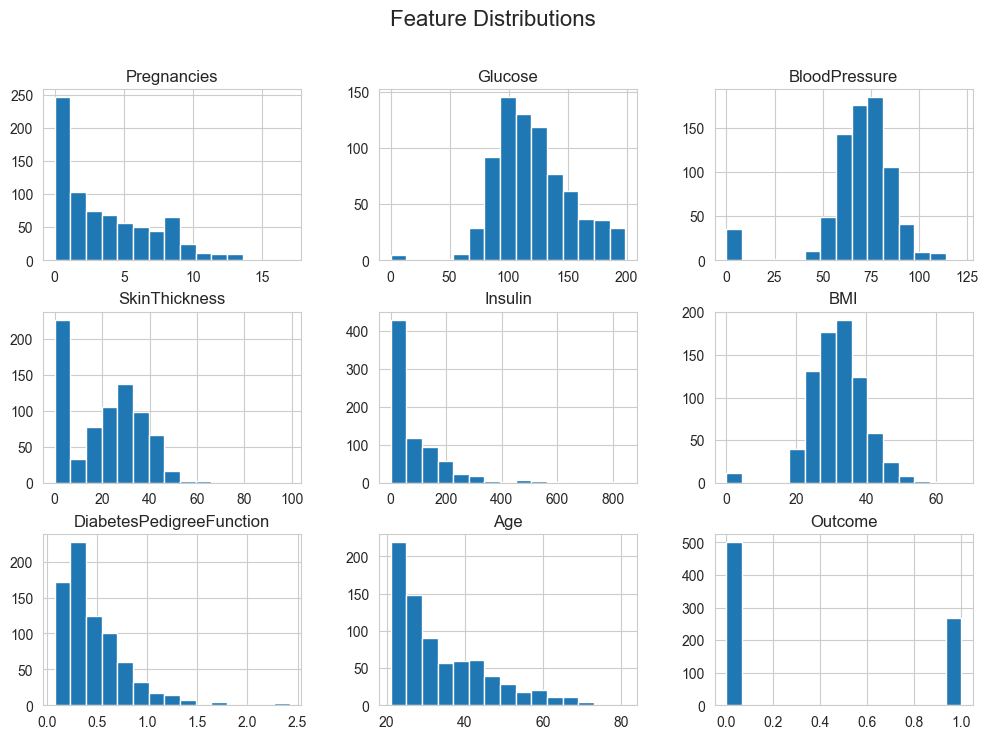

In [6]:
df.hist(bins=15, figsize=(12,8))
plt.suptitle("Feature Distributions", size=16)
plt.show()


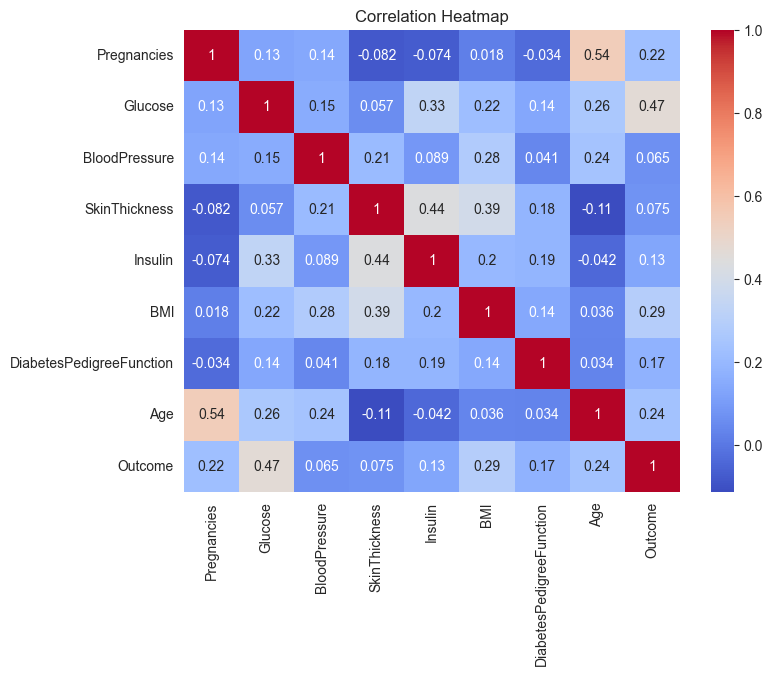

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


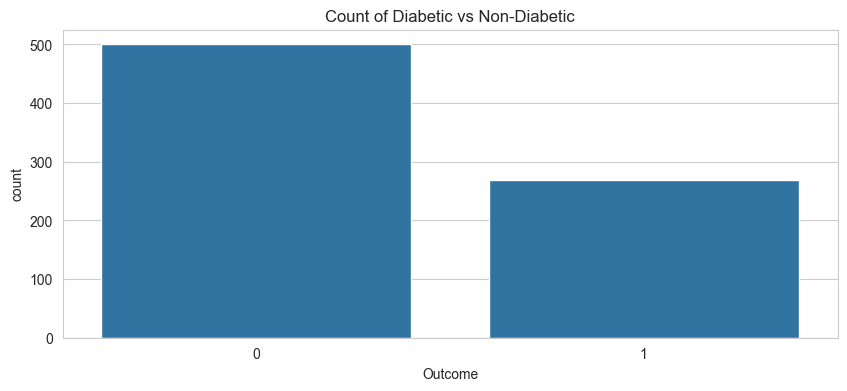

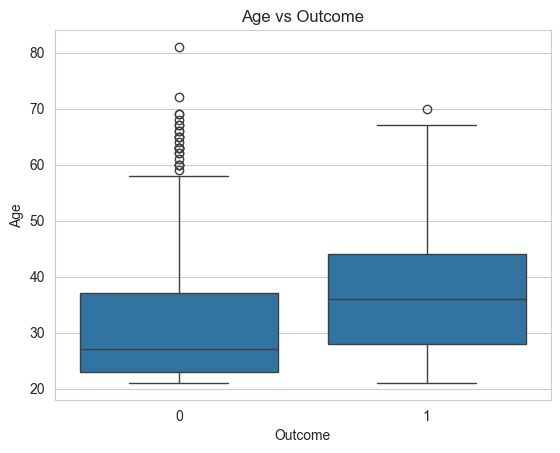

In [8]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outcome', data=df)
plt.title("Count of Diabetic vs Non-Diabetic")
plt.show()

sns.boxplot(x='Outcome', y='Age', data=df)
plt.title("Age vs Outcome")
plt.show()


Data Preprocessing:        
                             
1.	Impute missing values.                                                
2.	Encode categorical variables using one-hot encoding or label encoding.             
3.	If needed you can apply more preprocessing methods on the given dataset.


In [9]:
# Check missing values
print("Missing values before replacement:")
print(df.isnull().sum())

Missing values before replacement:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
# Columns where 0 means missing
cols_with_zero_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [11]:
# Replace 0 with NaN
df[cols_with_zero_missing] = df[cols_with_zero_missing].replace(0, np.nan)

In [12]:
# Impute missing values using median (Which is less sensitive to outliers)
for col in cols_with_zero_missing:
    df[col].fillna(df[col].median(), inplace=True)

print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Building Predictive Models:                
                                                                   
1.	Split the preprocessed dataset into training and testing sets.                   
2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.                                                        
3.	Build predictive models using LightGBM and XGBoost algorithms.                          
4.	Train the models on the training set and evaluate their performance on the testing set.         
5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.


In [13]:
# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [14]:
# Spliting the preproceesed dataset  into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
## LightGBM model
lgbm_model = LGBMClassifier(random_state=42, verbose=-1)
lgbm_model.fit(X_train, y_train)


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [16]:
# XGBoost model
xgbm_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', verbosity=0)
xgbm_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [17]:
# Predictions
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_xgbm = xgbm_model.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel Evaluation for: {model_name}")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 3))
    print("Precision:", round(precision_score(y_true, y_pred), 3))
    print("Recall:", round(recall_score(y_true, y_pred), 3))
    print("F1-Score:", round(f1_score(y_true, y_pred), 3))
    print("ROC-AUC:", round(roc_auc_score(y_true, y_pred), 3))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

evaluate_model(y_test, y_pred_lgbm, "LightGBM")
evaluate_model(y_test, y_pred_xgbm, "XGBoost")


Model Evaluation for: LightGBM
Accuracy: 0.766
Precision: 0.68
Recall: 0.63
F1-Score: 0.654
ROC-AUC: 0.735

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       100
           1       0.68      0.63      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154

Confusion Matrix:
 [[84 16]
 [20 34]]

Model Evaluation for: XGBoost
Accuracy: 0.76
Precision: 0.673
Recall: 0.611
F1-Score: 0.641
ROC-AUC: 0.726

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

Confusion Matrix:
 [[84 16]
 [21 33]]


In [18]:
#LightGBM Tuning:
lgbm_params = {
    'num_leaves': [15, 31, 63],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

grid_lgbm = GridSearchCV(
    LGBMClassifier(random_state=42),
    lgbm_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_lgbm.fit(X_train, y_train)
print("Best LightGBM Params:", grid_lgbm.best_params_)

Best LightGBM Params: {'learning_rate': 0.01, 'n_estimators': 300, 'num_leaves': 15}


In [19]:
#XGBoost Tuning:
xgbm_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

grid_xgbm = GridSearchCV(
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    xgbm_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_xgbm.fit(X_train, y_train)
print("Best XGBoost Params:", grid_xgbm.best_params_)


Best XGBoost Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


Comparative Analysis:                         

1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.  
2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.


In [20]:
# Calculate the performance metrics for both models
metrics = {
    "Model": ["LightGBM", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lgbm),
        accuracy_score(y_test, y_pred_xgbm)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lgbm),
        precision_score(y_test, y_pred_xgbm)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lgbm),
        recall_score(y_test, y_pred_xgbm)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_lgbm),
        f1_score(y_test, y_pred_xgbm)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_pred_lgbm),
        roc_auc_score(y_test, y_pred_xgbm)
    ]
}

comparison_df = pd.DataFrame(metrics)
print("\n🔹 Model Performance Comparison:\n")
print(comparison_df)



🔹 Model Performance Comparison:

      Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  LightGBM  0.766234   0.680000  0.629630  0.653846  0.734815
1   XGBoost  0.759740   0.673469  0.611111  0.640777  0.725556


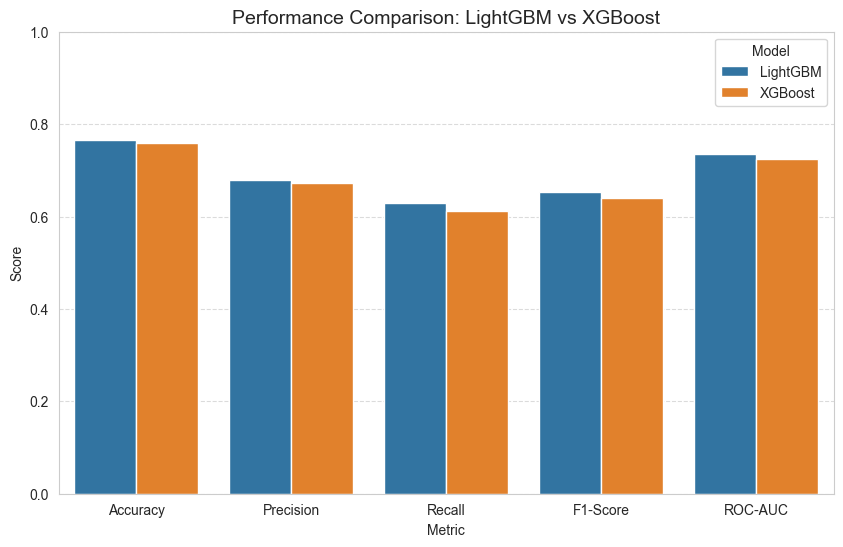

In [21]:
# Melt the DataFrame for better plotting
comparison_melted = comparison_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(10,6))
sns.barplot(x="Metric", y="Score", hue="Model", data=comparison_melted)
plt.title("Performance Comparison: LightGBM vs XGBoost", fontsize=14)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(title="Model")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
